# Data Science Challenge

### Exercise 1

In [3]:
import pandas as pd

In [5]:
root_bookings = 'challenge/bookings.csv.bz2'
root_searches = 'challenge/searches.csv.bz2'

In [61]:
BookingsFile = pd.read_csv(root_bookings, usecols=[0], sep='^', chunksize=10**6)
chunks = [chunk for chunk in BookingsFile]
df_bookings = pd.concat(chunks)

In [62]:
SearchesFile = pd.read_csv(root_searches, usecols=[0], sep='^', chunksize=10**6)
chunks = [chunk for chunk in SearchesFile]
df_searches = pd.concat(chunks)

In [64]:
print("Number of lines of Bookings: {:,}".format(df_bookings.shape[0]))
print("Number of lines of Searches: {:,}".format(df_searches.shape[0]))

Number of lines of Bookings: 10,000,010
Number of lines of Searches: 20,390,198


### Exercise 2

Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's try to have a look at the data

In [4]:
root = 'challenge/bookings.csv.bz2'

In [5]:
df = pd.read_csv(root, nrows=10000, sep='^')
df.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


Now that we know the dataset, let's import only the columns that we need

In [6]:
list(df.columns)

['act_date           ',
 'source',
 'pos_ctry',
 'pos_iata',
 'pos_oid  ',
 'rloc          ',
 'cre_date           ',
 'duration',
 'distance',
 'dep_port',
 'dep_city',
 'dep_ctry',
 'arr_port',
 'arr_city',
 'arr_ctry',
 'lst_port',
 'lst_city',
 'lst_ctry',
 'brd_port',
 'brd_city',
 'brd_ctry',
 'off_port',
 'off_city',
 'off_ctry',
 'mkt_port',
 'mkt_city',
 'mkt_ctry',
 'intl',
 'route          ',
 'carrier',
 'bkg_class',
 'cab_class',
 'brd_time           ',
 'off_time           ',
 'pax',
 'year',
 'month',
 'oid      ']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   act_date             10000 non-null  object
 1   source               10000 non-null  object
 2   pos_ctry             10000 non-null  object
 3   pos_iata             10000 non-null  object
 4   pos_oid              10000 non-null  object
 5   rloc                 10000 non-null  object
 6   cre_date             10000 non-null  object
 7   duration             10000 non-null  int64 
 8   distance             10000 non-null  int64 
 9   dep_port             10000 non-null  object
 10  dep_city             10000 non-null  object
 11  dep_ctry             10000 non-null  object
 12  arr_port             10000 non-null  object
 13  arr_city             10000 non-null  object
 14  arr_ctry             10000 non-null  object
 15  lst_port             10000 non-null  object
 16  lst_c

In [8]:
# selecting the year
print(df.year.value_counts())
df = df[df.year == 2013]
print(df.year.value_counts())

2013    10000
Name: year, dtype: int64
2013    10000
Name: year, dtype: int64


In [9]:
df = pd.read_csv(root, nrows=10000, usecols=['arr_port', 'pax'], sep='^', compression='bz2')
df.head()

,arr_port,pax
0,LHR,-1
1,CLT,1
2,CLT,1
3,SVO,1
4,SVO,1


In [10]:
# Select the desired columns
df = df[['arr_port', 'pax']]
df.head()

,arr_port,pax
0,LHR,-1
1,CLT,1
2,CLT,1
3,SVO,1
4,SVO,1


In [11]:
# Cleaning the arr_port column: strip, dropna, upper
df['arr_port'] = df.arr_port.dropna()
df['arr_port'] = df.arr_port.str.strip()
df['arr_port'] = df.arr_port.str.upper()

In [12]:
df_grouped = df.groupby('arr_port')['pax'].sum()
df_grouped.head()

arr_port
AAL     0
ABQ    12
ABV     2
ABZ    -6
ACC     4
Name: pax, dtype: int64

In [13]:
df_top = df_grouped.sort_values(ascending=False).head(10).reset_index()
df_top

,arr_port,pax
0,HKG,112
1,LGA,95
2,ORD,94
3,JFK,92
4,SFO,91
5,LAX,91
6,MCO,90
7,DCA,82
8,DEN,79
9,LHR,76


Time to visualize the TOP 10 arr_port

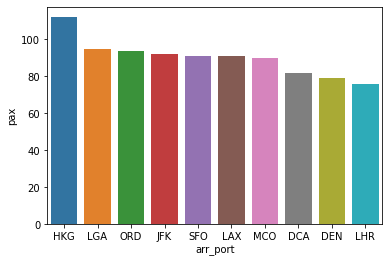

In [14]:
sns.barplot(data=df_top, x='arr_port', y='pax')
plt.show()

Get the name of the city/airport

In [15]:
cities = 'challenge/airport-codes_csv.csv.zip'

df_cities = pd.read_csv(cities, usecols=['iata_code', 'name'])
df_cities.head()

,name,iata_code
0,Total Rf Heliport,NaN
1,Aero B Ranch Airport,NaN
2,Lowell Field,NaN
3,Epps Airpark,NaN
4,Newport Hospital & Clinic Heliport,NaN


In [16]:
df_cities = df_cities.dropna()
df_cities.head()

,name,iata_code
223,Utirik Airport,UTK
440,Ocean Reef Club Airport,OCA
594,Pilot Station Airport,PQS
673,Crested Butte Airpark,CSE
1088,LBJ Ranch Airport,JCY


In [17]:
df_merged = df.merge(df_cities, left_on='arr_port', right_on='iata_code').drop('iata_code', axis=1)

col_order = ['arr_port', 'name', 'pax']
df_merged = df_merged[col_order]

df_merged

,arr_port,name,pax
0,LHR,London Heathrow Airport,-1
1,LHR,London Heathrow Airport,1
2,LHR,London Heathrow Airport,1
3,LHR,London Heathrow Airport,-1
4,LHR,London Heathrow Airport,1
...,...,...,...
10299,MRU,Sir Seewoosagur Ramgoolam International Airport,3
10300,XQP,Quepos Managua Airport,1
10301,XQP,Quepos Managua Airport,1
10302,SBZ,Sibiu International Airport,1


Now, we need to read the entire dataset

In [16]:
size = 10 ** 6
df_bd = pd.DataFrame()
CSVFile = pd.read_csv(root, usecols=['year', 'arr_port', 'pax'], sep='^', compression='bz2', encoding='utf-8', chunksize=size)

for df in CSVFile:
    df_bd = df_bd.append(df)

df_bd.head()

,arr_port,pax,year
0,LHR,-1.0,2013.0
1,CLT,1.0,2013.0
2,CLT,1.0,2013.0
3,SVO,1.0,2013.0
4,SVO,1.0,2013.0


In [19]:
df_bd = df_bd.dropna()
df_bd['year'] = df_bd['year'].astype(int)
df_bd.head()

,arr_port,pax,year
0,LHR,-1.0,2013
1,CLT,1.0,2013
2,CLT,1.0,2013
3,SVO,1.0,2013
4,SVO,1.0,2013


In [20]:
df_bd.year.value_counts()

2013    10000009
Name: year, dtype: int64

Creating a function to clean after reading the entine file

In [26]:
def clean_airport(data):
    "Returns DataFrame filtering and cleaning the initial dataset"
    import warnings
    
    warnings.filterwarnings('ignore')
    
    # Cleaning the year column:
    data['year'] = data.year.dropna()
    data = data[data.year == 2013]
    
    # Cleaning the arr_port column: strip, dropna, upper
    data['arr_port'] = data.arr_port.dropna()
    data['arr_port'] = data.arr_port.str.strip()
    data['arr_port'] = data.arr_port.str.upper()
    
    return data

Reading the file

In [27]:
size = 10 ** 6
CSVFile = pd.read_csv(root, usecols=['year', 'arr_port', 'pax'], sep='^', compression='bz2', chunksize=size)
chunks = [clean_airport(chunk) for chunk in CSVFile]

df_big = pd.concat(chunks)

df_big.head()

,arr_port,pax,year
0,LHR,-1.0,2013.0
1,CLT,1.0,2013.0
2,CLT,1.0,2013.0
3,SVO,1.0,2013.0
4,SVO,1.0,2013.0


In [28]:
# To avoid loading df_big each time:
df_bookings = df_big.copy()
df_bookings.shape

(10000009, 3)

In [29]:
df_cities = pd.read_csv(cities, usecols=['iata_code', 'name'])
df_cities.head()

,name,iata_code
0,Total Rf Heliport,NaN
1,Aero B Ranch Airport,NaN
2,Lowell Field,NaN
3,Epps Airpark,NaN
4,Newport Hospital & Clinic Heliport,NaN


Time to clean both dataframes

In [30]:
df_bookings['year'] = df_bookings.year.astype(int)
df_bookings.head()

,arr_port,pax,year
0,LHR,-1.0,2013
1,CLT,1.0,2013
2,CLT,1.0,2013
3,SVO,1.0,2013
4,SVO,1.0,2013


In [31]:
df_cities = df_cities.dropna()
df_cities.head()

,name,iata_code
223,Utirik Airport,UTK
440,Ocean Reef Club Airport,OCA
594,Pilot Station Airport,PQS
673,Crested Butte Airpark,CSE
1088,LBJ Ranch Airport,JCY


Now we merge both DataFrames

In [33]:
df_bookings = df_bookings[['arr_port', 'pax']]

df_merged = df_bookings.merge(df_cities, left_on='arr_port', right_on='iata_code').drop('iata_code', axis=1)

col_order = ['arr_port', 'name', 'pax']
df_merged = df_merged[col_order]

df_merged.head()

,arr_port,name,pax
0,LHR,London Heathrow Airport,-1.0
1,LHR,London Heathrow Airport,1.0
2,LHR,London Heathrow Airport,1.0
3,LHR,London Heathrow Airport,-1.0
4,LHR,London Heathrow Airport,1.0


We have the final DataFrame, so it is time to wrangler the data

In [55]:
df_grouped = df_merged.groupby(['arr_port', 'name'])['pax'].sum().astype(int)
df_grouped.head()

arr_port  name                        
AAB       Arrabury Airport                  30
AAE       Rabah Bitat Airport              810
AAL       Aalborg Airport                  810
AAN       Al Ain International Airport      20
AAQ       Anapa Vityazevo Airport         1650
Name: pax, dtype: int64

In [56]:
df_top = df_grouped.sort_values(ascending=False).head(10).reset_index()
df_top

,arr_port,name,pax
0,LHR,London Heathrow Airport,88809
1,MCO,Orlando International Airport,70930
2,LAX,Los Angeles International Airport,70530
3,LAS,McCarran International Airport,69630
4,JFK,John F Kennedy International Airport,66270
5,CDG,Charles de Gaulle International Airport,64490
6,BKK,Suvarnabhumi Airport,59460
7,MIA,Miami International Airport,58150
8,SFO,San Francisco International Airport,58000
9,DXB,Dubai International Airport,55590


As a final exercise, the top10 will be represented in a barplot

In [67]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:,}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords='offset points',
                    ha='center',
                    va='bottom')

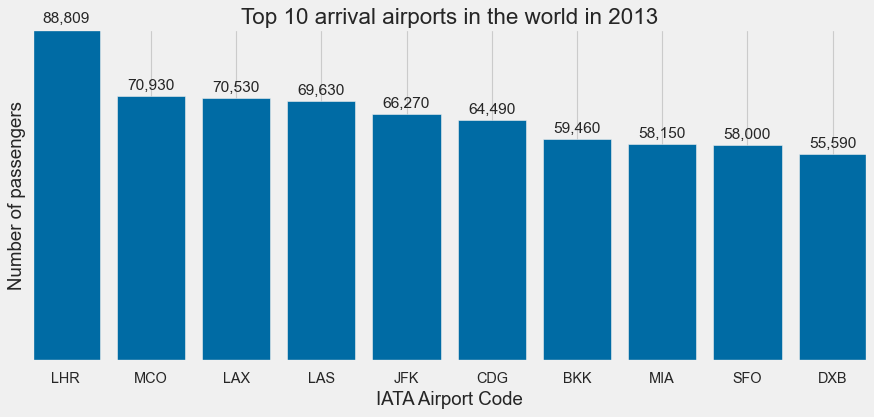

In [108]:
from matplotlib.ticker import FormatStrFormatter

plt.style.use("tableau-colorblind10")

fig, ax = plt.subplots(figsize=(12, 5))

rect = ax.bar(df_top.arr_port, df_top.pax)

autolabel(rect)
ax.set_title('Top 10 arrival airports in the world in 2013')
ax.set_xlabel('IATA Airport Code')
ax.set_ylabel('Number of passengers')
ax.set_yticks([])
# ax.yaxis.set_major_formatter(FormatStrFormatter(''))

plt.show()

### Exercise 3

In first instance, we will play with a sample of the DataFrame to do an EDA

In [8]:
df_smp_sch = pd.read_csv(root_searches, sep='^', nrows=10000)
df_smp_sch.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [9]:
list(df_smp_sch.columns)

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

In [10]:
df_smp_sch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               10000 non-null  object
 1   Time               10000 non-null  object
 2   TxnCode            10000 non-null  object
 3   OfficeID           10000 non-null  object
 4   Country            10000 non-null  object
 5   Origin             10000 non-null  object
 6   Destination        10000 non-null  object
 7   RoundTrip          10000 non-null  int64 
 8   NbSegments         10000 non-null  int64 
 9   Seg1Departure      10000 non-null  object
 10  Seg1Arrival        10000 non-null  object
 11  Seg1Date           9973 non-null   object
 12  Seg1Carrier        4047 non-null   object
 13  Seg1BookingCode    1143 non-null   object
 14  Seg2Departure      7196 non-null   object
 15  Seg2Arrival        7196 non-null   object
 16  Seg2Date           7161 non-null   object

In [ ]:
search_col = ['Date', 'Destination', 'Seg1Arrival', 'Seg1Arrival', 'Seg1Arrival', 'Seg1Arrival', 'Seg1Arrival', 'Seg1Arrival']
df_smp_sch = df_smp_sch[search_col]

### Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona
Plot a curve for each ccity in the same figure

In [7]:
SearchesFile = pd.read_csv(root_searches, usecols=[0,1,2], sep='^', chunksize=10**6)
chunks = [chunk for chunk in SearchesFile]
df_sch = pd.concat(chunks)
df_sch.head()

,Date,Time,TxnCode
0,2013-01-01,20:25:57,MPT
1,2013-01-01,10:15:33,MPT
2,2013-01-01,18:04:49,MPT
3,2013-01-01,17:42:40,FXP
4,2013-01-01,17:48:29,MPT


### Exercise 4

### Exercise 5